<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 6 - Classification and Regression Using Multilayer Perceptron</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `Car Prices.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Classification Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Multilayer Perceptron algorithm to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Tune the model's hyperparameters and discuss the results. 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
weatherAUS_df = pd.read_csv('weatherAUS.csv')
weatherAUS_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


**Dataset Information**

The `info()` method was used to obtain an overview of the dataset, including the number of columns, rows, and data types of each column.

In [56]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [57]:
weatherAUS_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


#### **Dealing with the missing, unnecessary and inconsistent data**
- For this  following steps were taken:
- Delete Duplicate/Redundant rows
- Delete the rows if Target variable has NA values- low no of rows.
- Impute the Numeric Features using the KNNImputer - Neighbors=5
- Impute the Categorical Features based on Mode


In [58]:
#Find NA Values across the columns
NA_val_across_columns = weatherAUS_df.isnull().sum()
print(NA_val_across_columns)

#Find the total NA cell values across the dataset
total_NA_count_across_df = NA_val_across_columns.sum()
print("Total NA Count\t=>",total_NA_count_across_df)

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64
Total NA Count	=> 75908


**Deleting the Redundant data - unnecessary data**

In [59]:
# Removing duplicate rows and keep only the last occurrence
weatherAUS_df = weatherAUS_df.drop_duplicates(keep='last')

**Dropping the inconsistent row Target value with NA**

In [60]:
#Remove NA values row from the Target RainTomorrow 
weatherAUS_df.dropna(subset=['RainTomorrow'], inplace=True)
print(weatherAUS_df.shape[0])



36261


**Observing the Class Imbalance**

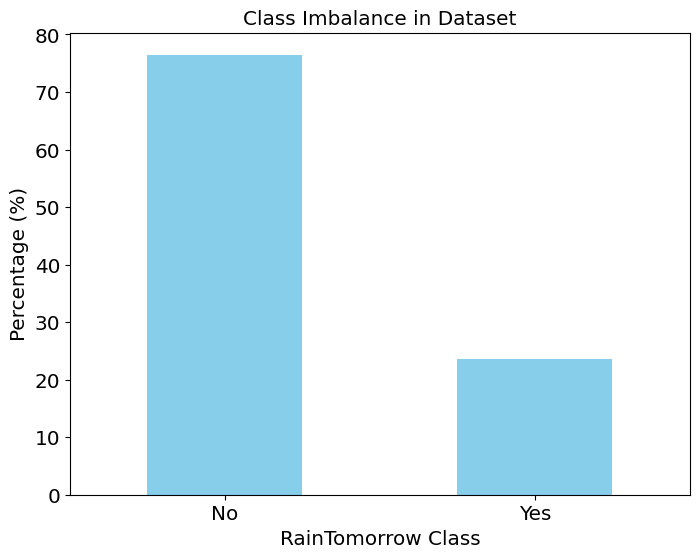

In [61]:
import matplotlib.pyplot as plt

# Calculate the count of each class
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Calculate the percentage of each class
class_imbalance_percentage = (class_counts / len(weatherAUS_df)) * 100

# Plot the histogram
plt.figure(figsize=(8, 6))
class_imbalance_percentage.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance in Dataset')
plt.xlabel('RainTomorrow Class')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


**Performing data balance based**

In [62]:
import pandas as pd

# Assuming weatherAUS_df is your DataFrame containing the data
# Assuming RainTomorrow is the target variable

# Step 1: Measure the count of each class of RainTomorrow
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Step 2: Determine the minority class
minority_class = class_counts.idxmin()

# Step 3: Sample an equal number of data points from each class
balanced_data = pd.concat([
    weatherAUS_df[weatherAUS_df['RainTomorrow'] == minority_class],
    weatherAUS_df[weatherAUS_df['RainTomorrow'] != minority_class].sample(n=class_counts[minority_class], random_state=78)
])

# Display the class counts in the balanced dataset
print(balanced_data['RainTomorrow'].value_counts())
weatherAUS_df = balanced_data

RainTomorrow
Yes    8529
No     8529
Name: count, dtype: int64


In [63]:
import pandas as pd


# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 9039


> **We still have 9k data rows consisting at least one  value, which is half of the dataset.
Hence, we cannot drop those rows but need to impute.**

**Numeric Missing Data Imputation**

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Select numeric columns for normalization and imputation
numeric_columns = weatherAUS_df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numeric columns
normalized_data = scaler.fit_transform(numeric_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Impute missing values on normalized data
imputed_data = imputer.fit_transform(normalized_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Inverse transform to get original scale
imputed_original_scale = scaler.inverse_transform(imputed_df)

# Update the original DataFrame with the imputed values
weatherAUS_df[numeric_columns.columns] = imputed_original_scale

# Verify if any missing values are remaining
print("Number of missing values after imputation:")
print(weatherAUS_df.isnull().sum())

print(weatherAUS_df.head())
# Now weatherAUS_df contains imputed values for normalized numeric columns


Number of missing values after imputation:
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      1465
WindGustSpeed       0
WindDir9am       1163
WindDir3pm        390
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         221
RISK_MM             0
RainTomorrow        0
dtype: int64
          Date    Location  MinTemp  MaxTemp      Rainfall  Evaporation  \
5    9/28/2011     Mildura     15.7     27.3 -4.440892e-16        11.20   
11    3/3/2009   Nuriootpa     16.4     28.0  1.000000e+00         5.00   
15  11/22/2009  Launceston     10.7     18.0  6.000000e+00         2.96   
21   11/5/2010   NorahHead     13.8     19.2  1.860000e+01         4.36   
23  10/31/2010  Launceston     14.4     2

**Categorical Missing Data Imputation**


In [65]:

categorical_columns = weatherAUS_df.select_dtypes(exclude=['number'])
for column in categorical_columns.columns.tolist():
    weatherAUS_df[column] = weatherAUS_df[column].fillna(weatherAUS_df[column].mode()[0])
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 0


In [66]:
categorical_columns = weatherAUS_df.select_dtypes(exclude=['number'])
for column in categorical_columns.columns.tolist():
    weatherAUS_df[column] = weatherAUS_df[column].fillna(weatherAUS_df[column].mode()[0])
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 0


<Figure size 800x600 with 0 Axes>

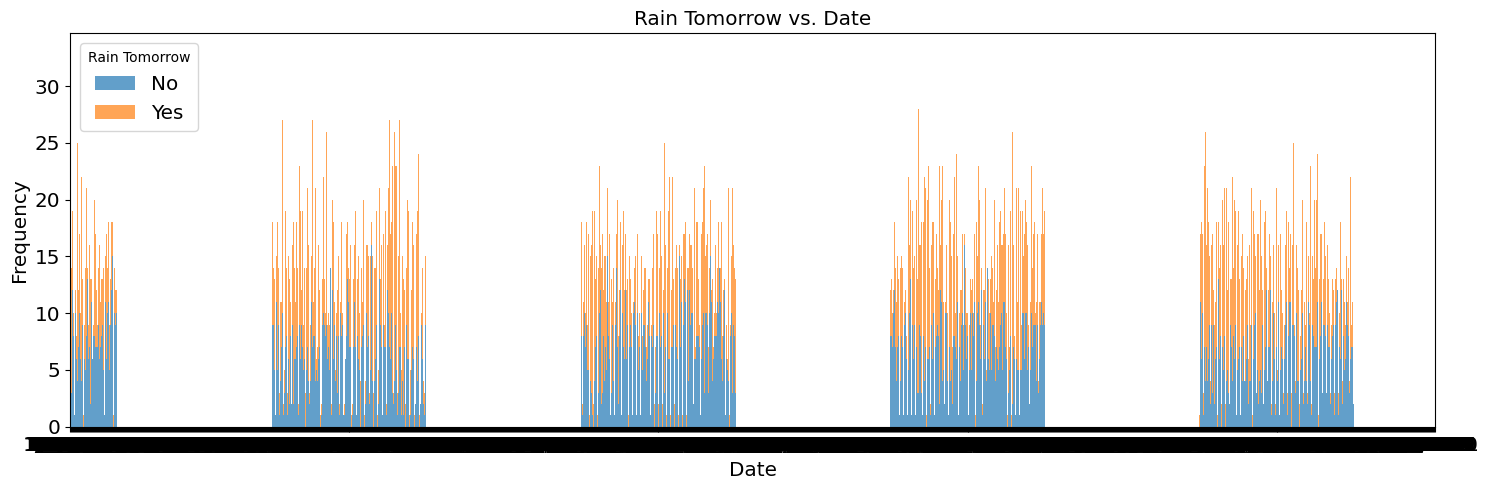

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'weatherAUS_df' is your DataFrame containing the data

# Group the data by 'RainToday' and 'RainTomorrow' and count occurrences
rain_counts = weatherAUS_df.groupby(['Date', 'RainTomorrow']).size().unstack()

# Plot the relationship using a stacked bar plot
plt.figure(figsize=(8, 6))
rain_counts.plot(kind='bar', stacked=True, alpha=0.7)
plt.title('Rain Tomorrow vs. Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Rain Tomorrow', loc='upper left')
plt.tight_layout()
plt.show()


**Dropping insignificant Feature `Date`**

In [68]:

weatherAUS_df = weatherAUS_df.drop(columns=['Date'])
numeric_cols = weatherAUS_df.select_dtypes(include = np.number).columns.to_list()

print(weatherAUS_df.shape[0])

17058


#### **Dealing with the irregular data (outliers)**
 - Visualizing through the boxplot after computing the `zscore`
 - Observing the number of outlier-rows using `zscore` with threshold value `3`.
 - Dropping the outlier as they seem comparitively low in number in context to the total instances of data.
 
 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


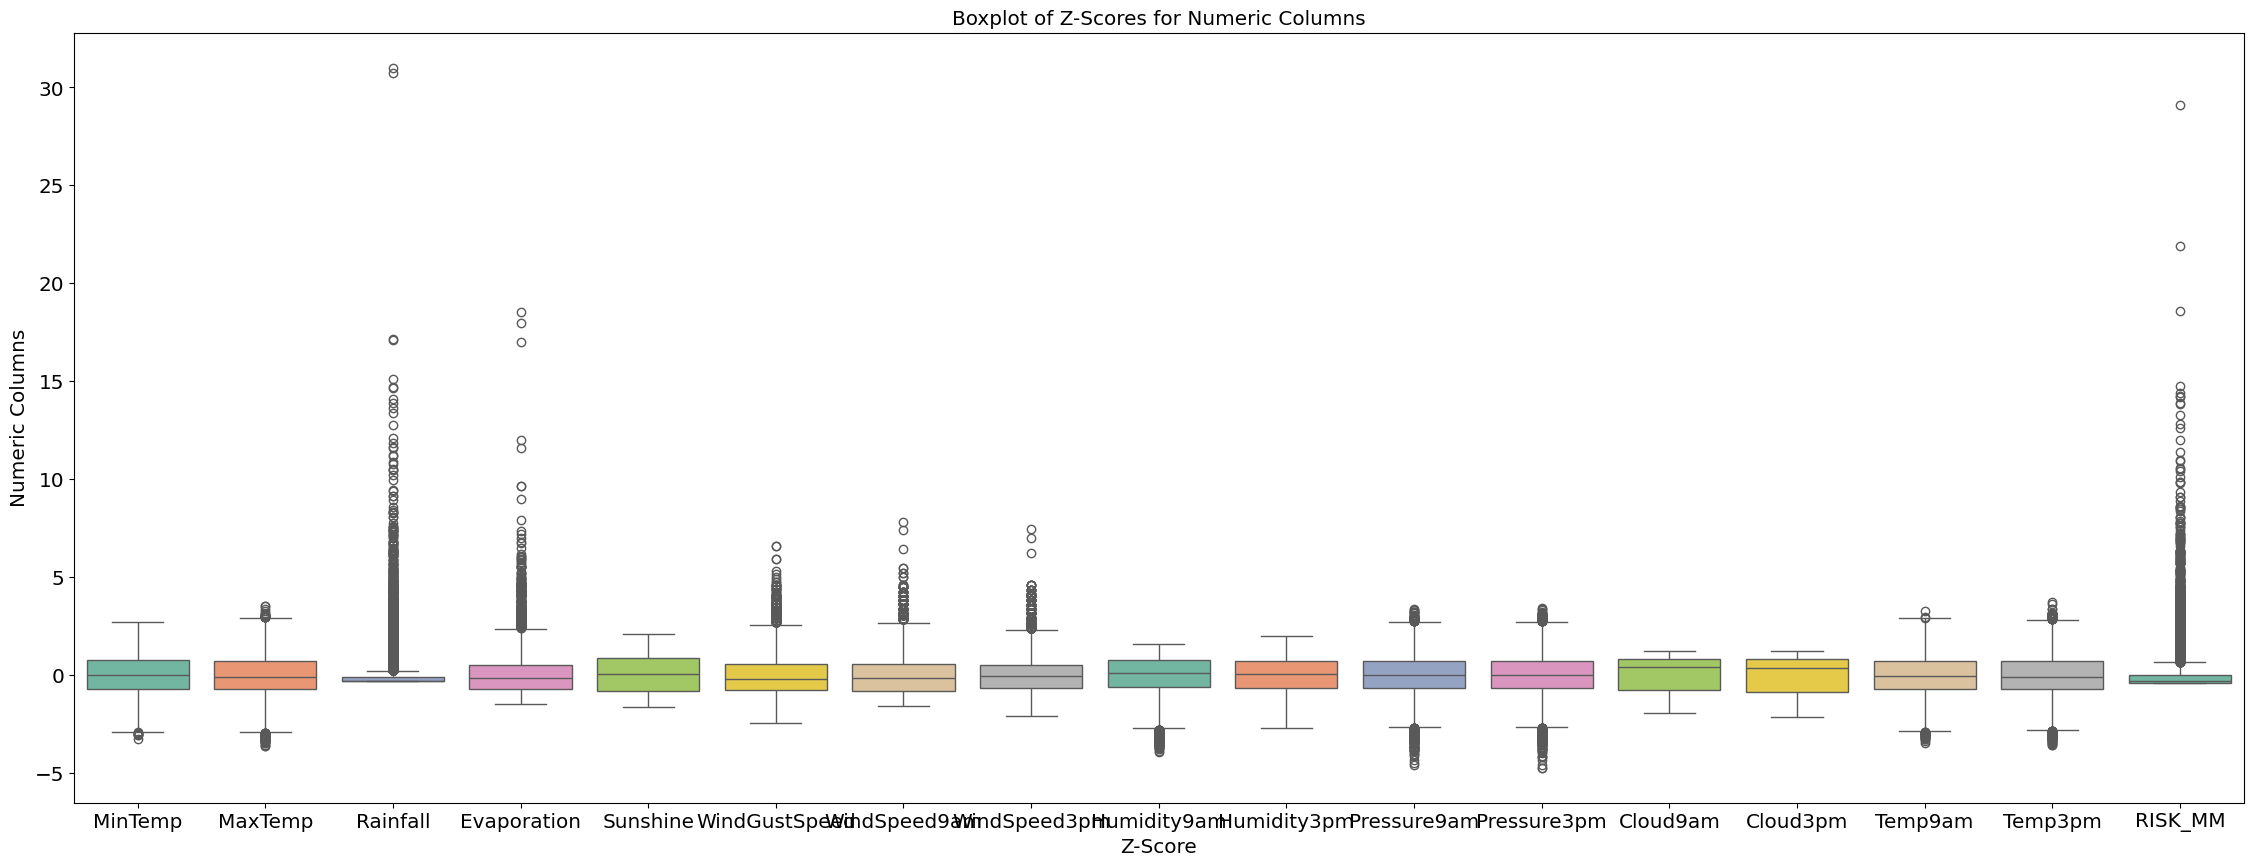

Total data row count => 17058
Oultlier row count => 1312


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate z-scores for each numeric column
weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
print(weatherAUS_df_numeric.columns.tolist())
z_scores = stats.zscore(weatherAUS_df_numeric)

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=weatherAUS_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 10))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
print("Total data row count =>",weatherAUS_df.shape[0])
outlier_rows = weatherAUS_df[(abs_z_scores > threshold).any(axis=1)]
print("Oultlier row count =>",outlier_rows.shape[0])


In [70]:
# We only take the data with no outliers
weatherAUS_df = weatherAUS_df[(abs_z_scores < threshold).all(axis=1)]


#### **Encoding categorical data**
> - Performed `label encoding` on the target variable `RainTomorrow`.
> - Performed `one-hot encoding` on the categorical feature.

In [71]:
# Label Encoding the Target Variable
weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0}) 
weatherAUS_df['RainTomorrow'] = weatherAUS_df['RainTomorrow'].astype(int)


# Perform one-hot encoding on all categorical columns
weatherAUS_final_df = pd.get_dummies(weatherAUS_df)
weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_6396/2853105599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0})
/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_6396/2853105599.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


**Viewing First Rows**
The `head()` method was employed to display the first 5 rows of the data frame, allowing a quick glimpse of the data.



In [72]:
print(weatherAUS_final_df.head())


    MinTemp  MaxTemp      Rainfall  Evaporation  Sunshine  WindGustSpeed  \
5      15.7     27.3 -4.440892e-16        11.20      5.60           65.0   
11     16.4     28.0  1.000000e+00         5.00      1.70           65.0   
15     10.7     18.0  6.000000e+00         2.96      2.54           33.0   
21     13.8     19.2  1.860000e+01         4.36      3.74           61.0   
23     14.4     21.1  4.400000e+00         4.76      6.44           57.0   

    WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
5           11.0          13.0         60.0         86.0  ...             0   
11          15.0          37.0         39.0         96.0  ...             0   
15           6.0          15.0         93.0         87.0  ...             0   
21          31.0          22.0         75.0         83.0  ...             1   
23          13.0          37.0         74.0         67.0  ...             0   

    WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \


In [73]:
print(weatherAUS_final_df.isna().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_No      0
RainToday_Yes     0
Length: 114, dtype: int64


#### **Q1.2.Visualize the dataset**

Following plots and matrices were used to visualize the dataset, to analyze the features of the dataset.
 1. `Histogram` plot between features and target to gain insights on the `feature distribution` with respect to target `RainTomorrow`.
 2. `Scatter matrix` between every features and the target to see the scattering of data points and to get visual of relationships.
 3. Create Co-relation matrix of `RainTomorrow` with other features to detect if there is weak relation such that some feature could be rule out if it is the uncorrelated feature. 
 

**`Histogram` plot between features and target along with `feature distribution`.**

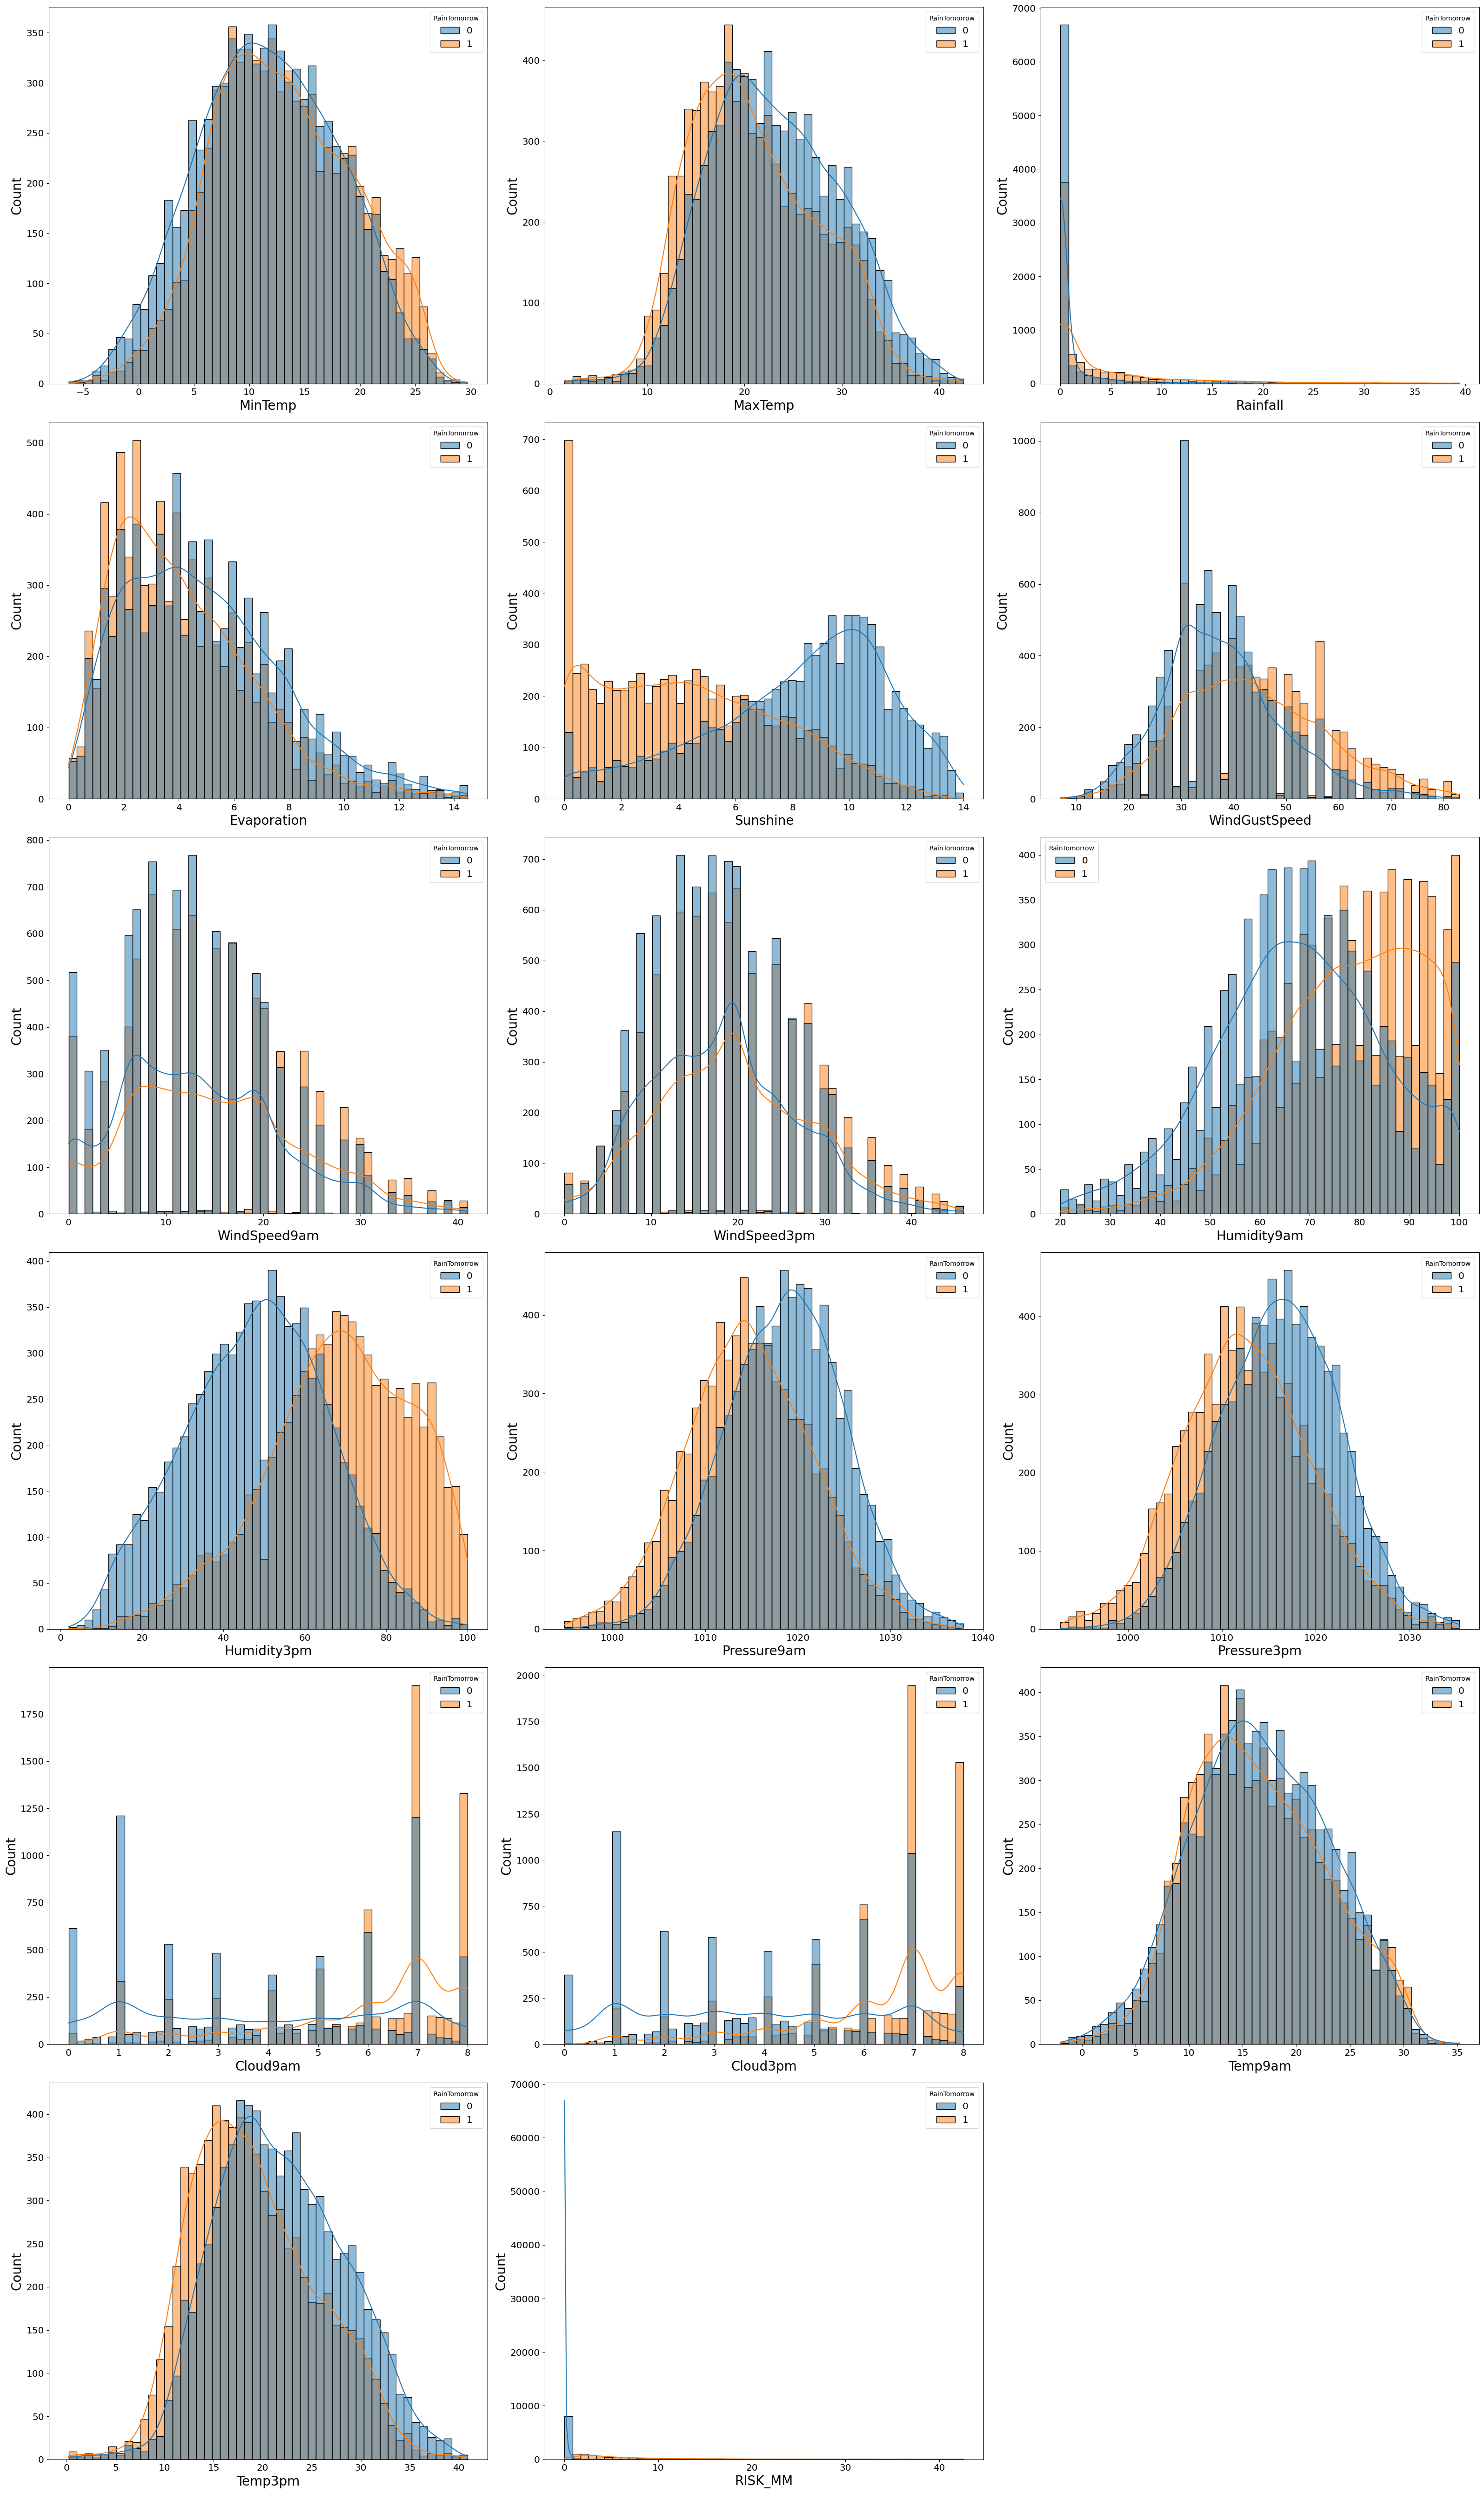

In [74]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

weatherAUS_df_numerics = weatherAUS_df.select_dtypes(include=['number'])
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(weatherAUS_df_numerics, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

**Scatter Matrix: Between Every Features, and the Target**

In [75]:
# sns.pairplot(weatherAUS_df_numerics, hue='RainTomorrow')

**Scatter Plot Between Target and Features**

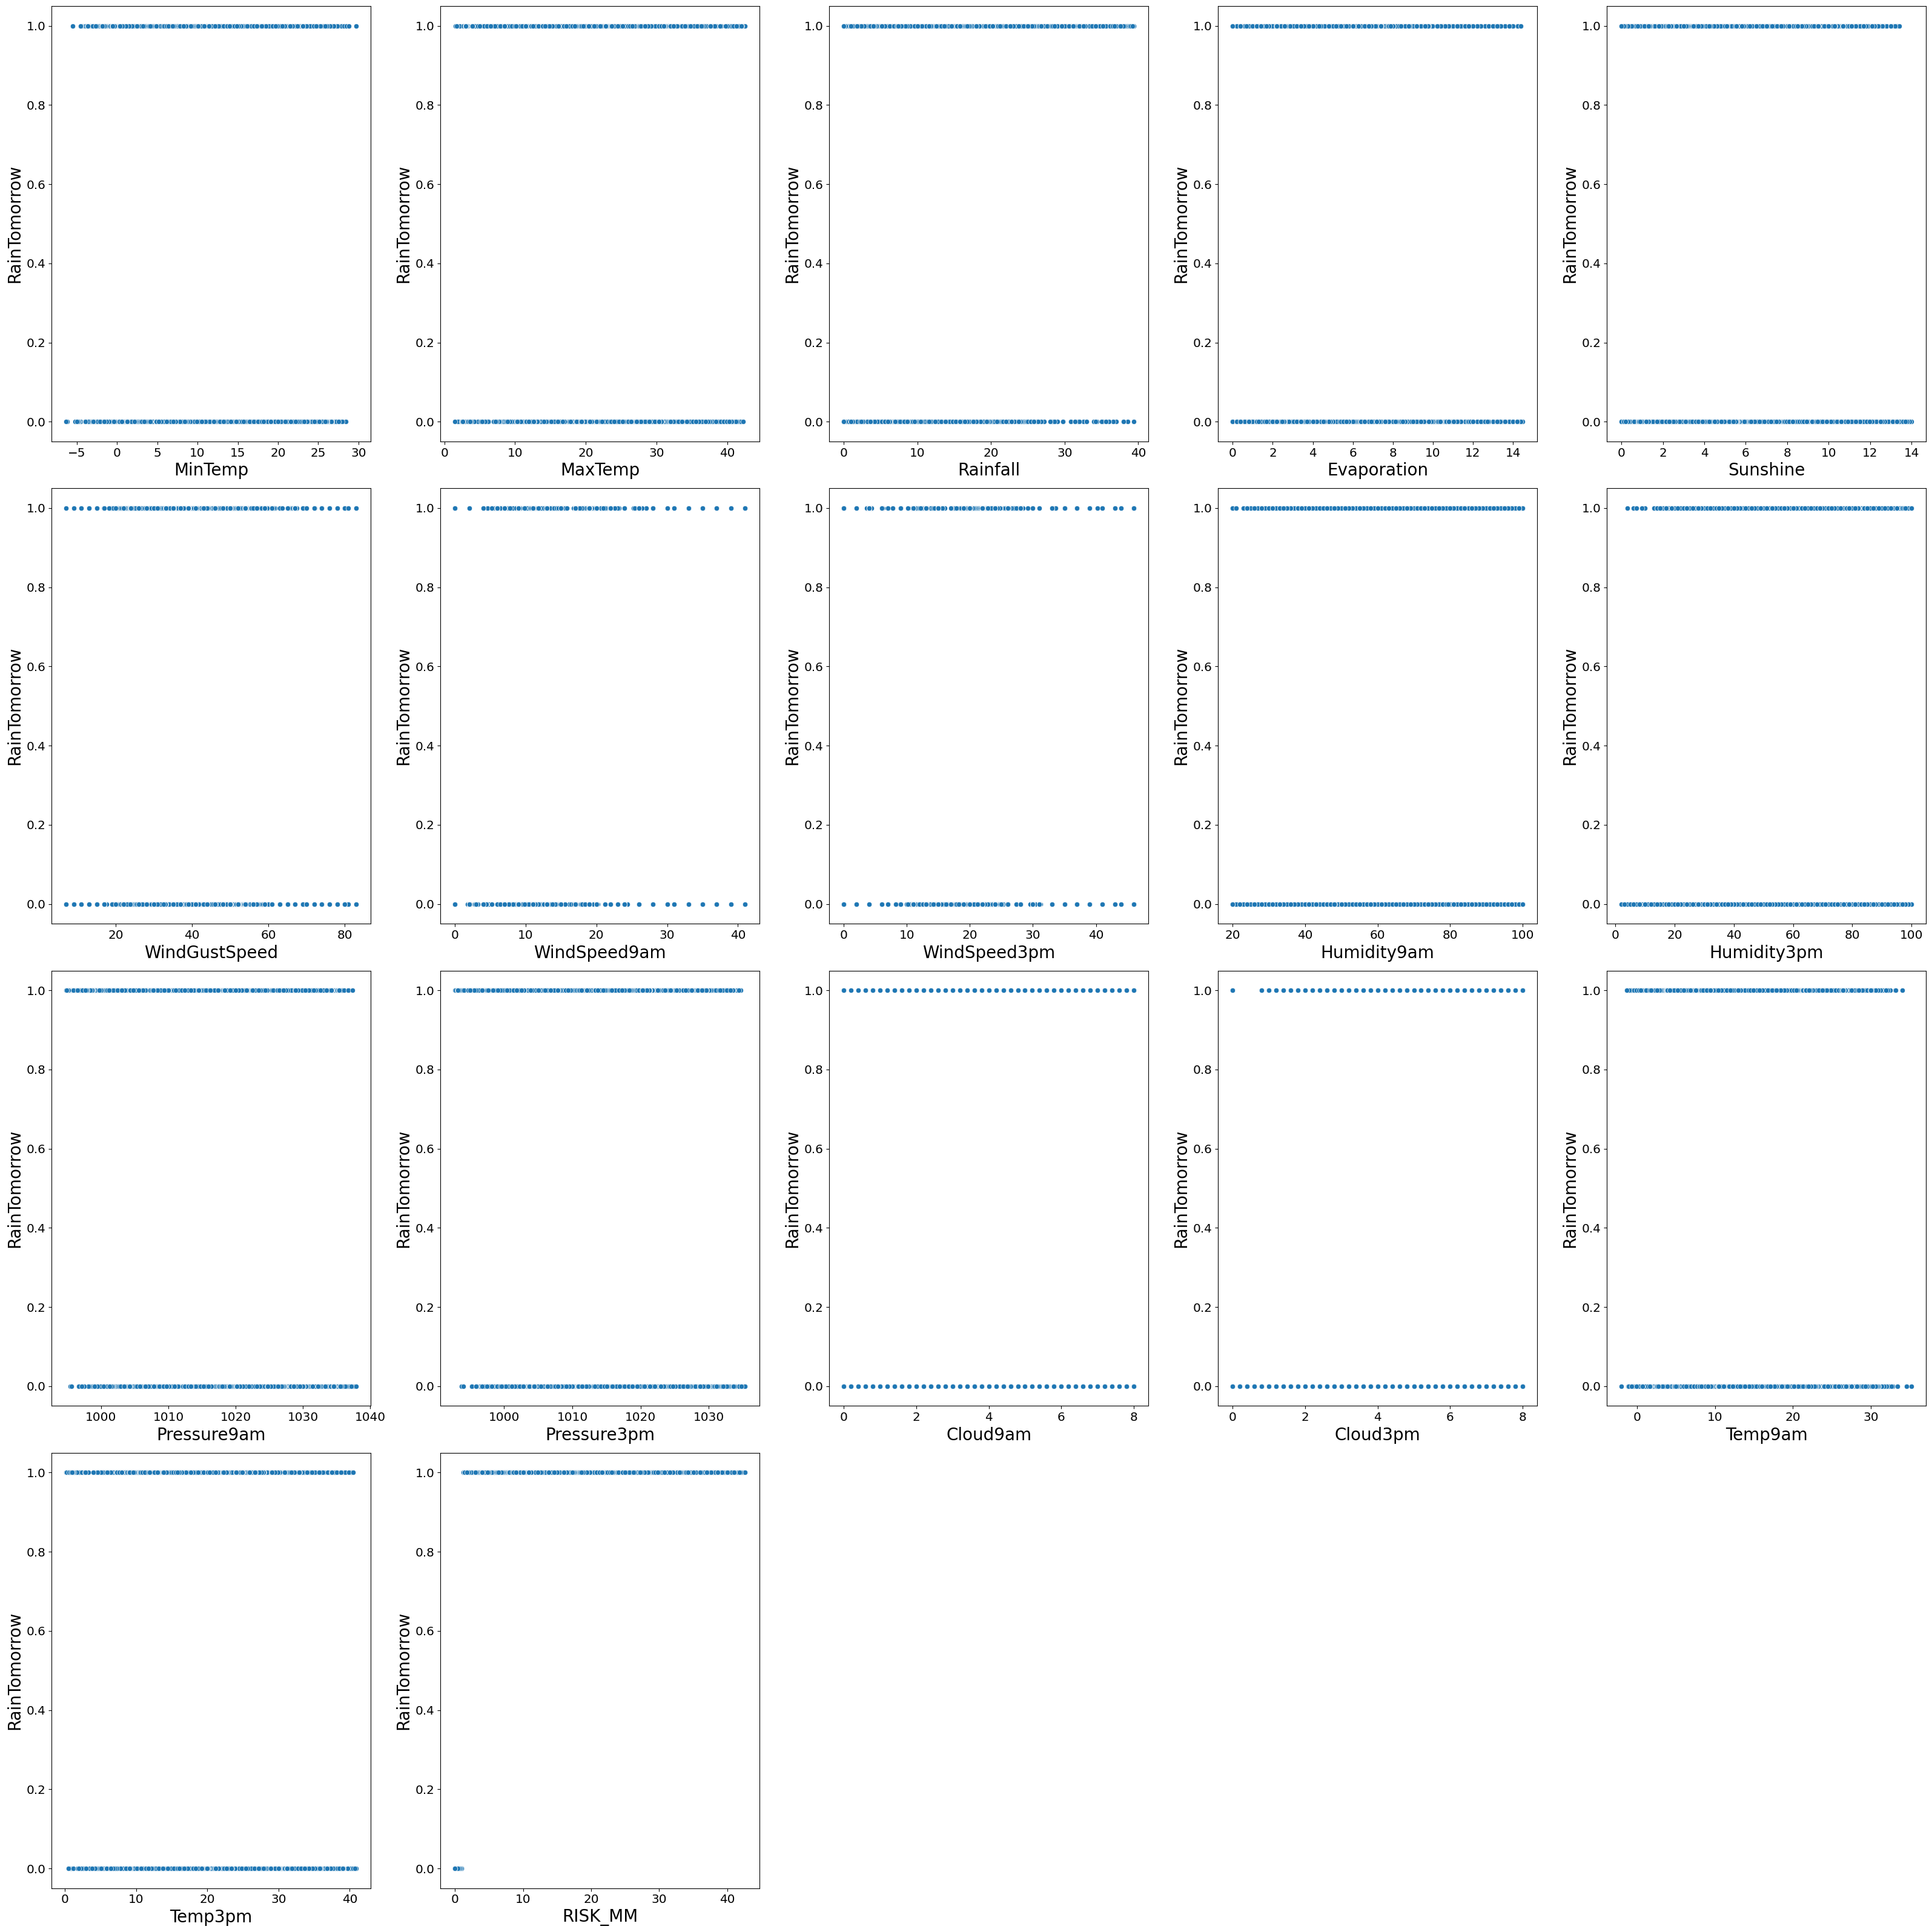

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=weatherAUS_df_numerics, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()


**Box Plot: Features Vs. Target**

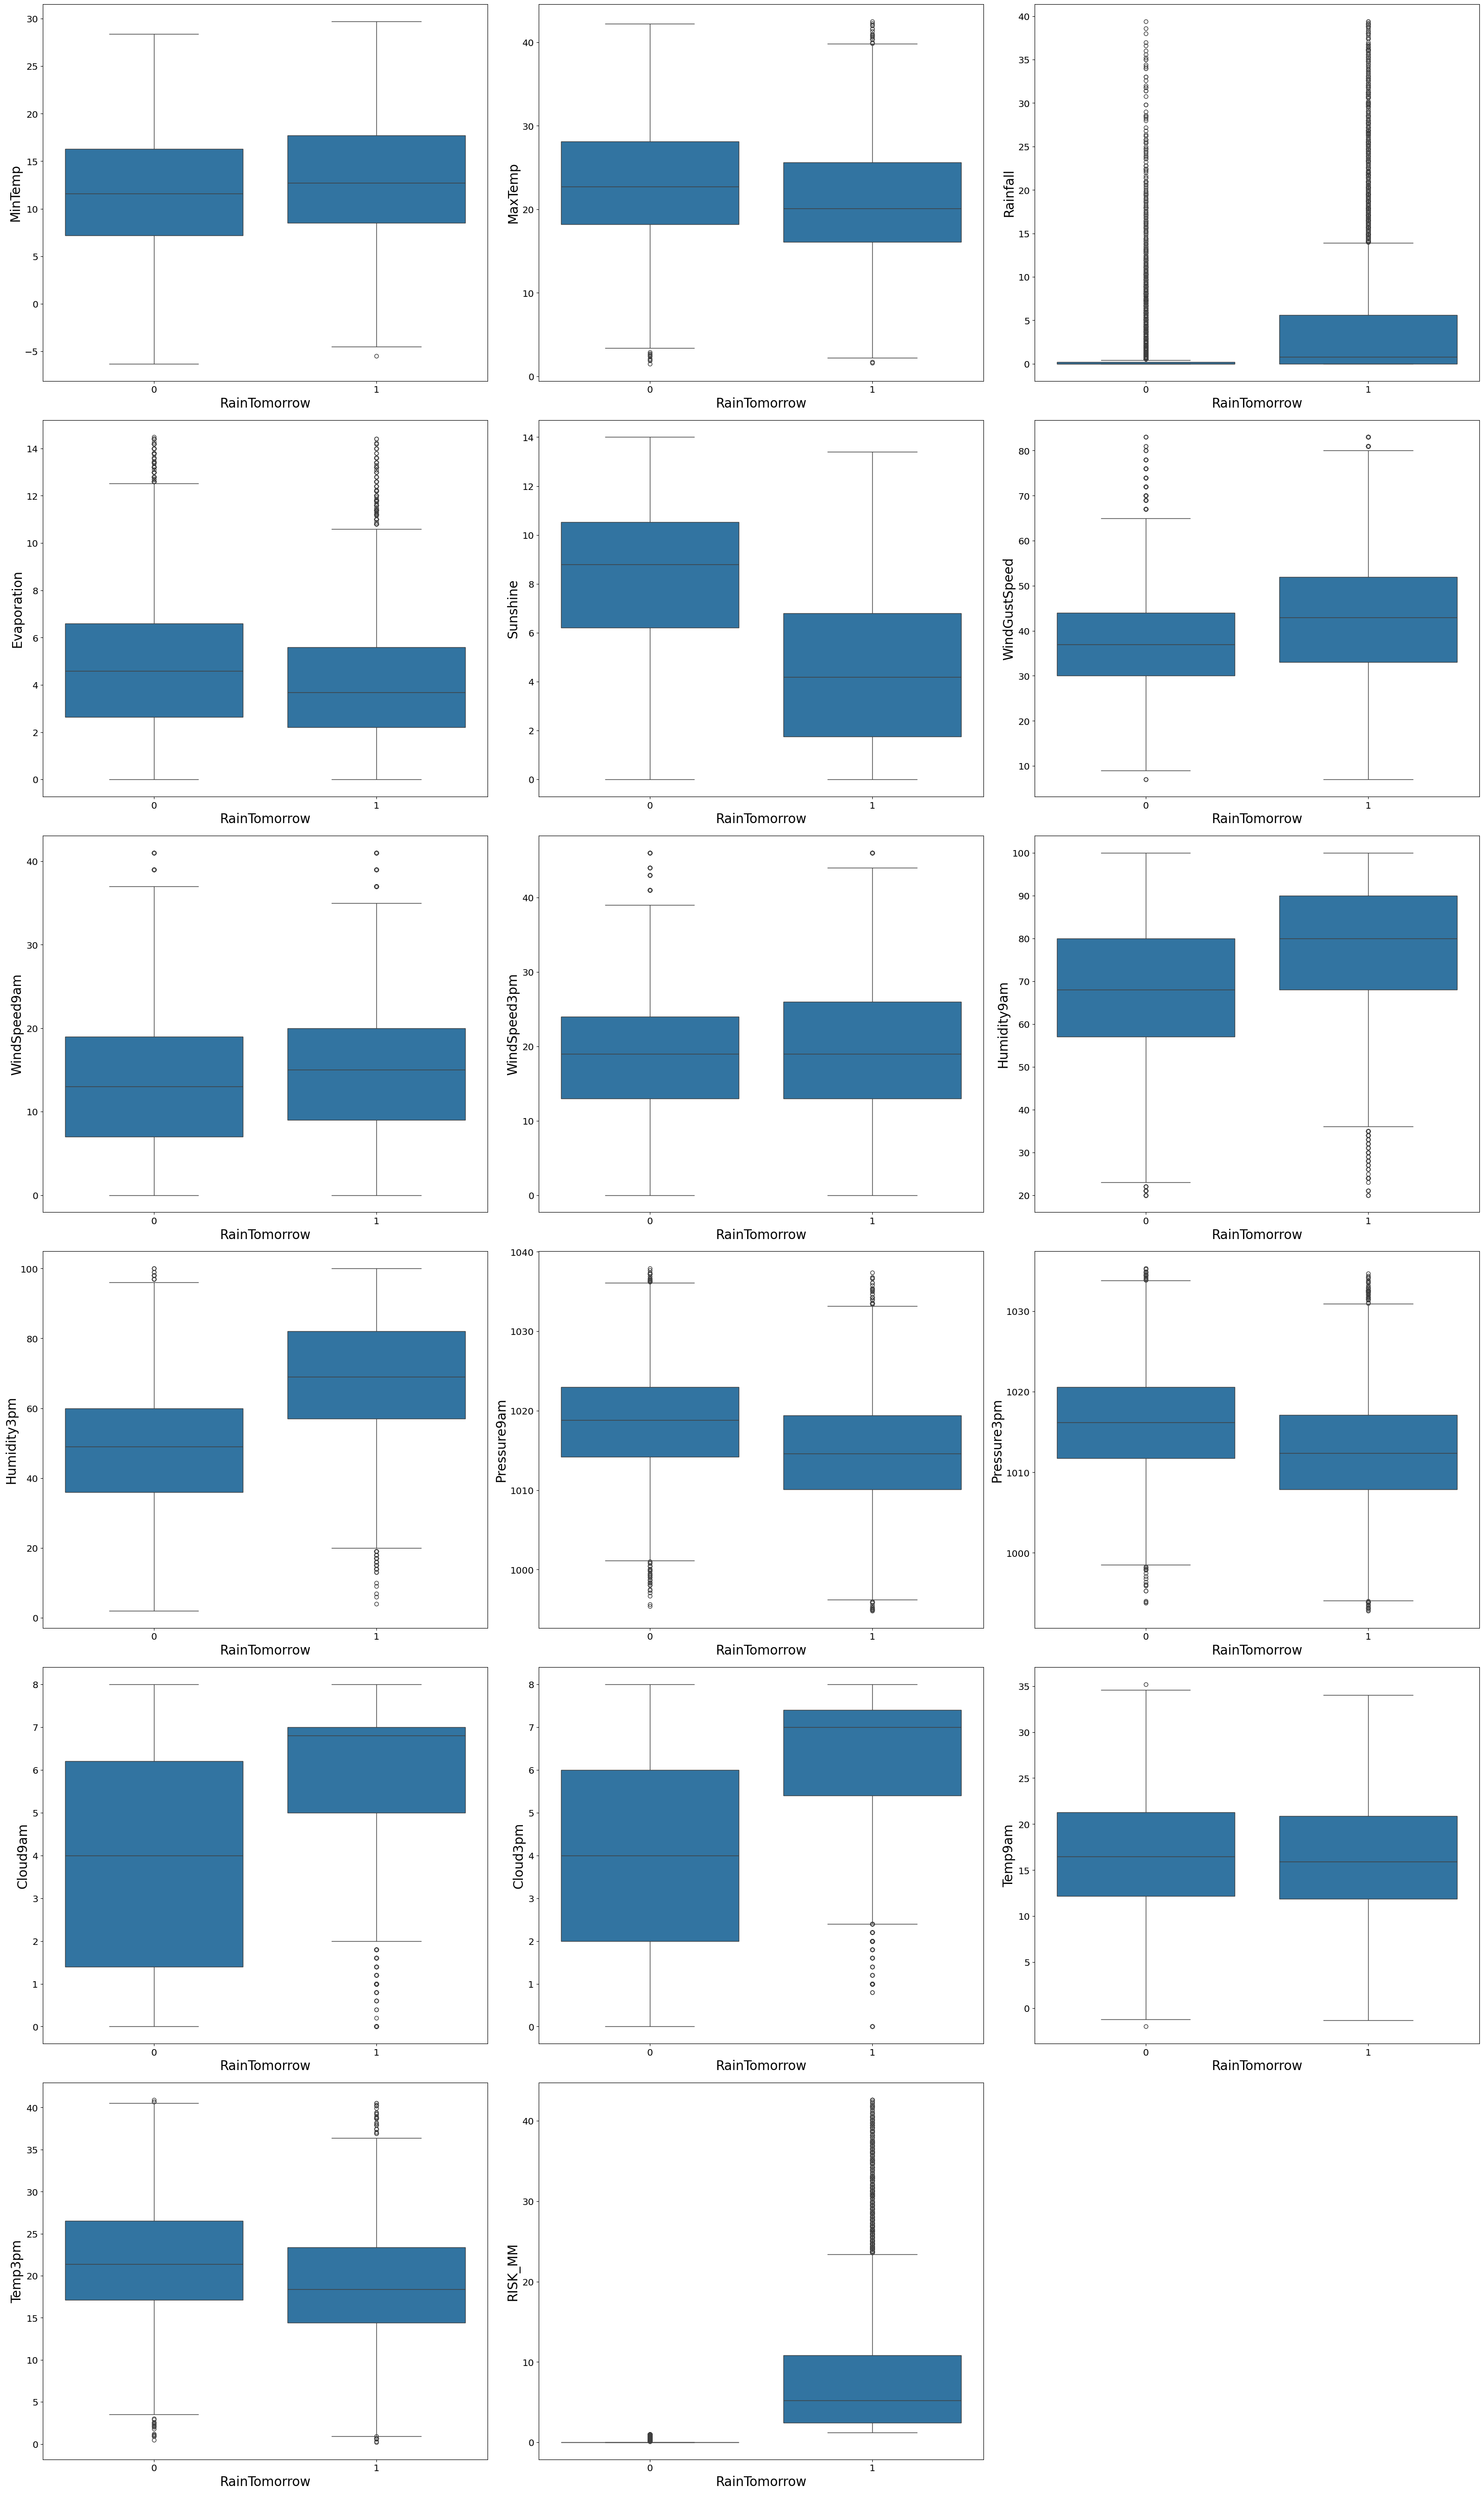

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=weatherAUS_df_numerics, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

**Correlation matrix Heatmap of features.**

MinTemp          0.107473
MaxTemp         -0.165179
Rainfall         0.270391
Evaporation     -0.140729
Sunshine        -0.501339
WindGustSpeed    0.236205
WindSpeed9am     0.098776
WindSpeed3pm     0.077028
Humidity9am      0.297382
Humidity3pm      0.498048
Pressure9am     -0.278201
Pressure3pm     -0.257938
Cloud9am         0.395895
Cloud3pm         0.485570
Temp9am         -0.011487
Temp3pm         -0.208237
RISK_MM          0.581551
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64


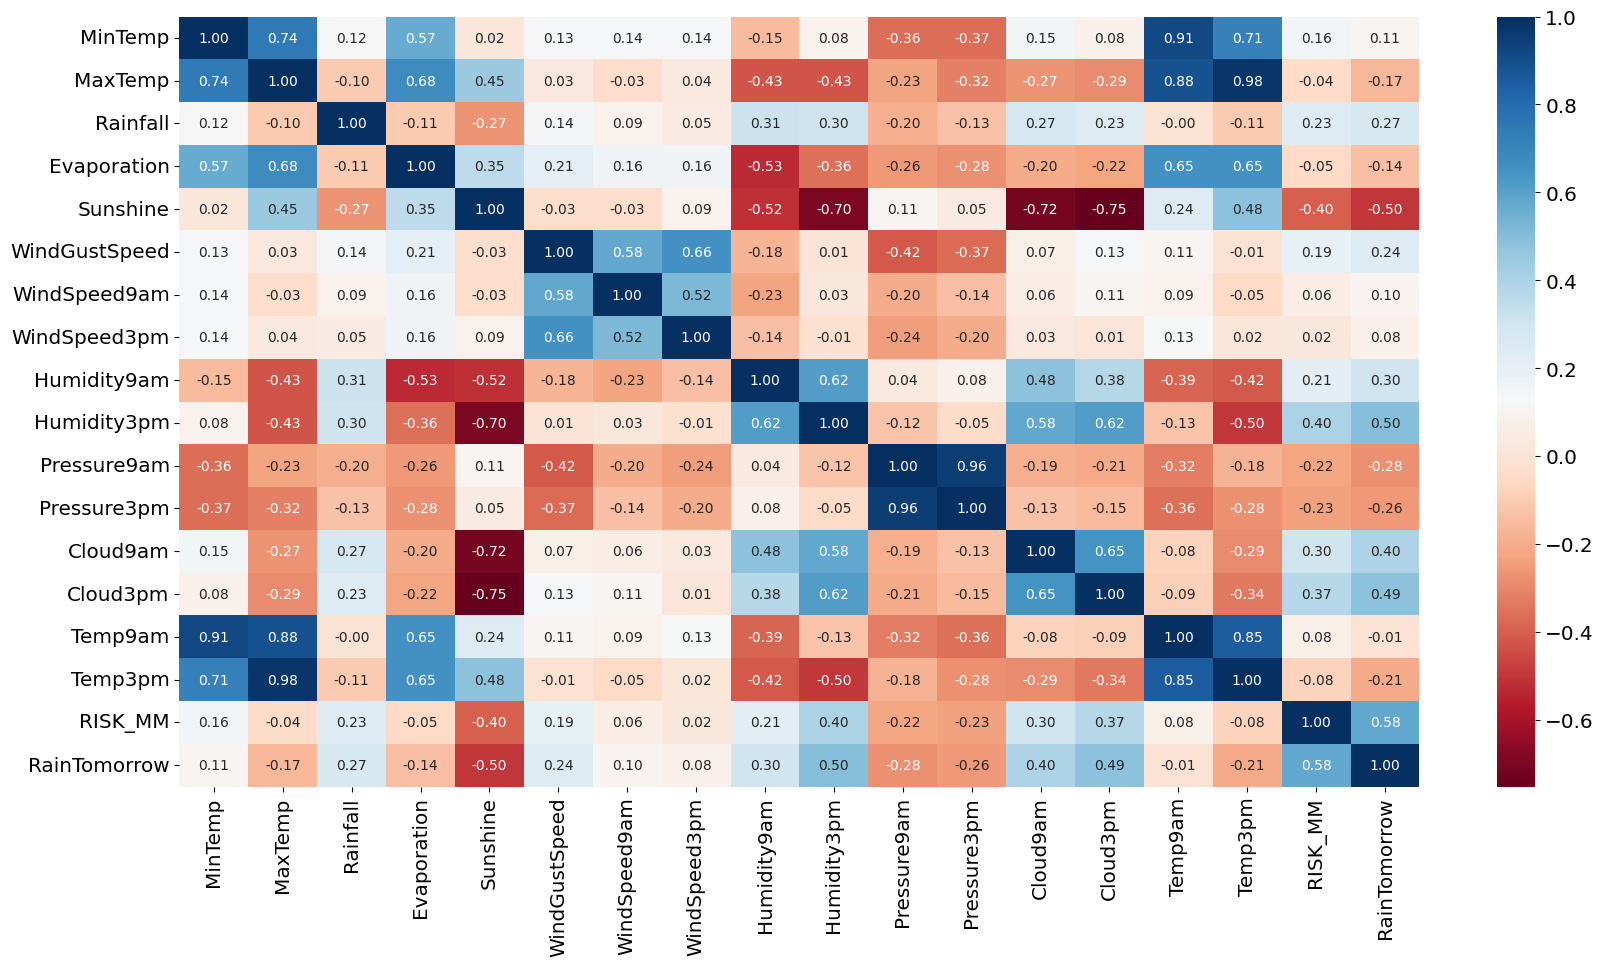

In [78]:
weatherAUS_df_corr_matrix = weatherAUS_df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(weatherAUS_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f");
print(weatherAUS_df_corr_matrix['RainTomorrow'])

#### **Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability.**

>The preliminary observations about the dataset shows that there were un-ncecessay feature **`Date`**, which we got rid of, the model was trained prior with the feature however, did not observed much change in model performance.
>Also the **class imbalance** was observed in the dataset, with almost `75%` of data belonging to `No` class and `25%` to `Yes` class for target `RainTomorrow`. The dataset was balanced by taking the same no of rows as of the minority class `No` from `RainTomorrow` target.

>From the visualization such as scatter plot and the co-relation matrix we can see that features such as **`RISK_MM`, `Humidity3pm`, `Sunshine`, `Cloud3pm`** have a little good co-relation with RainTomorrow Target. While when we make observation on the features with the low correlation, we need to be aware that there could be a case that two features in together could be affecting the `RainTomorrow`. So dropping the features all the time might not be a solution, also might create an overfitting problem.The histogram plot has aided in finding out the distribution of the features with respect to different types of `RainTomorrow` class.

In [79]:
X = weatherAUS_final_df.drop('RainTomorrow', axis=1)
y = weatherAUS_final_df['RainTomorrow']



#### **Q1.4.Build a classification model using Multilayer Perceptron algorithm to predict the target variable `RainTomorrow` from the dataset.**

In [80]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:

from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50),
                               activation='relu',
                               solver='adam',
                               max_iter=1000,
                               random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [83]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9587301587301588


#### **Q1.5.Tune the model's hyperparameters and discuss the results.**

In [84]:
for item in np.logspace(-4, 0, 5):
    print(item)

0.0001
0.001
0.01
0.1
1.0


In [85]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 0, 5),
}

# Perform Randomized Search
random_search = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), param_dist, cv=5, n_iter=5)
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate model with best parameters
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'alpha': 0.1, 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.1, early_stopping=True,
              hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
Best Model Accuracy: 0.9828571428571429


In [86]:
from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=random_search.best_params_['hidden_layer_sizes'] ,
                               activation=random_search.best_params_['activation'],
                               solver=random_search.best_params_['solver'],
                               max_iter=500,
                               alpha=random_search.best_params_['alpha'],
                               random_state=42)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(50, 50),
              max_iter=500, random_state=42)

In [87]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9841269841269841


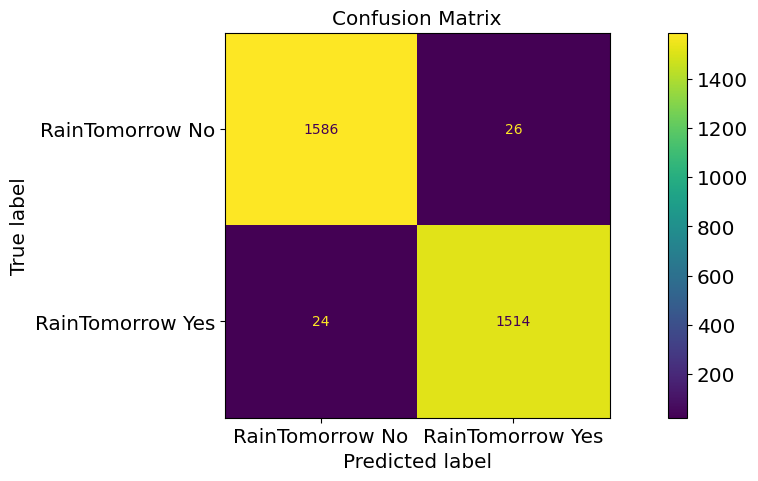

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['RainTomorrow No','RainTomorrow Yes'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


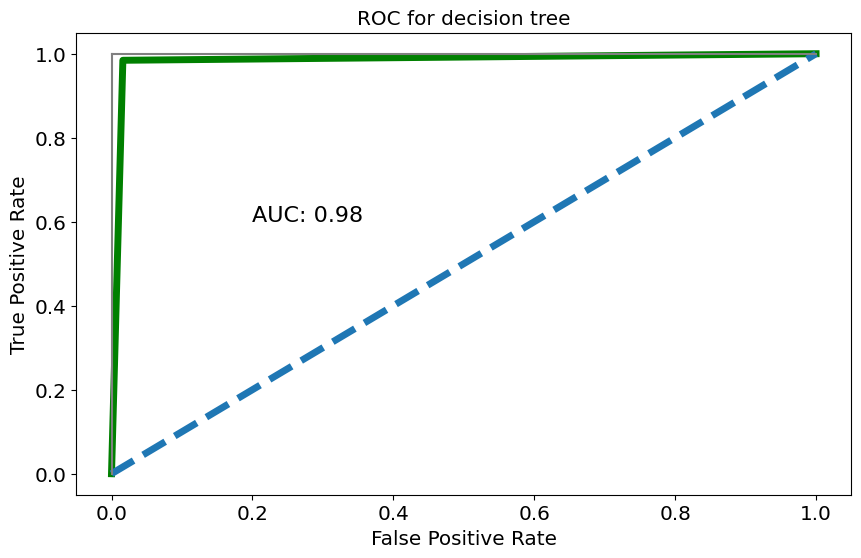

In [89]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Question 2: Regression Using Multilayer Perceptron 
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a multilayer perceptron model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Tune the model's hyperparameters and discuss the results.

In [90]:
hyper

NameError: name 'hyper' is not defined

In [ ]:
car_dataframe = pd.read_csv("Car Prices.csv")


In [ ]:
car_dataframe.info()

In [ ]:
car_dataframe.describe()

In [ ]:
# Identify missing values
missing_values = car_dataframe.isnull().any()
print(missing_values) #Printing the series after checking missing values


In [ ]:
# Scatter plot of two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='car_ID', y='price', data=car_dataframe)
plt.title('Scatter Plot of Car ID vs Price')
plt.xlabel('car_ID ')
plt.grid(True)
plt.tight_layout()
plt.ylabel('price ')
plt.show()

In [ ]:
car_dataframe = car_dataframe.drop(columns=['car_ID','CarName'])

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Compute Z-scores for numeric columns
numeric_columns = car_dataframe.select_dtypes(include=['number'])
z_scores = stats.zscore(numeric_columns)

# Create a DataFrame of absolute Z-scores
abs_z_scores_df = pd.DataFrame(np.abs(z_scores), columns=numeric_columns.columns)

# Plot box plot for Z-scores of each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=abs_z_scores_df)
plt.title('Box Plot of Z-scores for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Absolute Z-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


from sklearn.preprocessing import RobustScaler

# # Calculate Z-scores

abs_z_scores = np.abs(z_scores)


# Identify outlier values
outlier_mask = abs_z_scores > 3
outlier_values = car_dataframe[outlier_mask]


# Get numeric columns only
numeric_columns = car_dataframe.select_dtypes(include=np.number).columns
print(numeric_columns)

# Calculate mean value of columns containing outliers
outlier_columns_mean = outlier_values.mean()

# Replace outlier values with mean value of respective columns
for column in numeric_columns:
    car_dataframe.loc[outlier_mask[column], column] = outlier_columns_mean[column]






In [ ]:
# # Identify categorical columns
categorical_cols = car_dataframe.select_dtypes(exclude=['number']).columns.tolist()

# # Perform one-hot encoding for nominal categorical columns

car_dataframe = pd.get_dummies(car_dataframe, columns=categorical_cols)
# Assuming 'car_dataframe' is your DataFrame
# Assuming 'car_dataframe' is your DataFrame
car_dataframe = car_dataframe.map(lambda x: 1 if x == True else (0 if x == False else x))


In [ ]:
#re-indexing of target column which changed during transformation
# # Assuming 'car_dataframe' is your DataFrame and 'column_index' is the index of the column you want to move
column_name = 'price'
column_index = car_dataframe.columns.get_loc(column_name)
# # Create a list of column names with the specified column moved to the last position
new_column_order = list(car_dataframe.columns[:column_index]) + list(car_dataframe.columns[column_index+1:]) + [column_name]

# Reindex the DataFrame with the new column order
car_dataframe = car_dataframe.reindex(columns=new_column_order)
print("Columns after one-hot encoding =>\t",sorted(car_dataframe.columns.tolist()))


In [ ]:
car_dataframe.info()

In [ ]:
car_dataframe.head()

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['highwaympg', 'stroke','carheight', 'price',]
scatter_matrix(car_dataframe[attributes], figsize=(18, 10))
plt.show()

In [ ]:
 # numeric_dataframe_prior_encoding Dataframe containing numeric features only prior encoding
numeric_dataframe_prior_encoding = car_dataframe[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
correlation_matrix = numeric_dataframe_prior_encoding.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix['price'])

In [ ]:
# Extracting the Independent and Dependent variables

y = car_dataframe['price']
X = car_dataframe.drop(['price'], axis=1)


In [ ]:
print(car_dataframe)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                             activation='relu',
                             solver='adam',
                             max_iter=1000,
                             early_stopping=True,
                             alpha=0.0001,
                             random_state=42)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Perform Grid Search
grid_search = GridSearchCV(MLPRegressor(max_iter=2000, random_state=42, early_stopping=True), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Best Model Mean Squared Error:", mse)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                             activation='tanh',
                             solver='sgd',
                             max_iter=2000,
                             early_stopping=True,
                             alpha=0.01,
                             random_state=42)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

<div class="alert alert-block alert-info">

# Part 2: Reflection 

</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

In [ ]:
??? 

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab6.ipynb** to the **Lab 6 - Classification and Regression Using Multilayer Perceptron (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 2.5          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
